In [1]:
%matplotlib inline
import leafmap
import pandas
import pandas as pd
import seaborn as sns

In [3]:
fafsa = pandas.read_excel("Copy of WI FAFSA Completions thru 042222-Copy1.xlsx")
fafsa.columns

Index(['Name', 'City', 'State', 'Applications\nSubmitted\nApr22  2022',
       'Applications\nComplete\nApr22  2022',
       'Applications\nSubmitted\nApr22  2021',
       'Applications\nComplete\nApr22  2021',
       'Applications\nSubmitted\nJun  2021',
       'Applications\nComplete\nJun  2021',
       'Applications\nSubmitted\nDec  2021',
       'Applications\nComplete\nDec  2021'],
      dtype='object')

In [4]:
fafsa.rename(columns={'Applications\nSubmitted\nDec  2021':'SubDec21','Applications\nComplete\nDec  2021':'ComDec21','Applications\nComplete\nJun  2021':'ComJun21','Applications\nSubmitted\nJun  2021':'SubJun21', 'Applications\nComplete\nApr22  2021':'ComApr22-21', 'Applications\nSubmitted\nApr22  2021':'SubApr22-21', 'Applications\nComplete\nApr22  2022':'ComApr22-22', 'Applications\nSubmitted\nApr22  2022':'SubApr22-22'},inplace=True)

In [5]:
fafsa.columns

Index(['Name', 'City', 'State', 'SubApr22-22', 'ComApr22-22', 'SubApr22-21',
       'ComApr22-21', 'SubJun21', 'ComJun21', 'SubDec21', 'ComDec21'],
      dtype='object')

In [6]:
fafsa.head()

,Name,City,State,SubApr22-22,ComApr22-22,SubApr22-21,ComApr22-21,SubJun21,ComJun21,SubDec21,ComDec21
0,ABBOTSFORD MIDDLE/SENIOR HIGH,ABBOTSFORD,WI,20,19,24,23,26,25,29,28
1,ABUNDANT LIFE CHRISTIAN SCHOOL,MADISON,WI,8,8,9,9,9,9,11,11
2,ADAMS-FRIENDSHIP HIGH,ADAMS,WI,30,30,32,30,39,36,43,42
3,ALBANY HIGH,ALBANY,WI,10,9,11,11,11,11,11,11
4,ALGOMA HIGH,ALGOMA,WI,16,16,19,18,20,19,20,20


<AxesSubplot:xlabel='SubDec21', ylabel='ComDec21'>

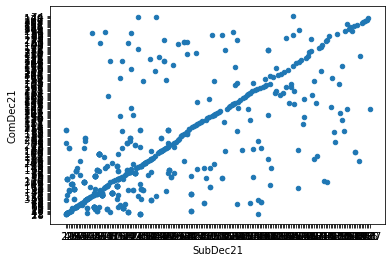

In [7]:
fafsa.plot.scatter(x='SubDec21', y='ComDec21')

In [8]:
import numpy as np
fafsa['ComDec21'].astype(object)
fafsa['SubDec21'].astype(object)

0       29
1       11
2       43
3       11
4       20
      ... 
581     39
582     10
583     66
584     80
585      6
Name: SubDec21, Length: 586, dtype: object

In [9]:
modfafsa=fafsa[fafsa['SubDec21']!='<5']
modfafsa=modfafsa[modfafsa['ComDec21']!='<5']
modfafsa

,Name,City,State,SubApr22-22,ComApr22-22,SubApr22-21,ComApr22-21,SubJun21,ComJun21,SubDec21,ComDec21
0,ABBOTSFORD MIDDLE/SENIOR HIGH,ABBOTSFORD,WI,20,19,24,23,26,25,29,28
1,ABUNDANT LIFE CHRISTIAN SCHOOL,MADISON,WI,8,8,9,9,9,9,11,11
2,ADAMS-FRIENDSHIP HIGH,ADAMS,WI,30,30,32,30,39,36,43,42
3,ALBANY HIGH,ALBANY,WI,10,9,11,11,11,11,11,11
4,ALGOMA HIGH,ALGOMA,WI,16,16,19,18,20,19,20,20
...,...,...,...,...,...,...,...,...,...,...,...
581,WITTENBERG-BIRNAMWOOD HIGH,WITTENBERG,WI,31,31,31,31,34,34,39,38
582,WONEWOC-CENTER HIGH,WONEWOC,WI,10,9,9,9,10,10,10,10
583,WRIGHTSTOWN HIGH,WRIGHTSTOWN,WI,50,48,56,55,62,60,66,63
584,XAVIER HIGH SCHOOL,APPLETON,WI,66,65,76,74,78,76,80,77


In [10]:
modfafsa['dfDec21']=modfafsa['SubDec21'].astype(int)-modfafsa['ComDec21'].astype(int)

In [11]:
modfafsa

,Name,City,State,SubApr22-22,ComApr22-22,SubApr22-21,ComApr22-21,SubJun21,ComJun21,SubDec21,ComDec21,dfDec21
0,ABBOTSFORD MIDDLE/SENIOR HIGH,ABBOTSFORD,WI,20,19,24,23,26,25,29,28,1
1,ABUNDANT LIFE CHRISTIAN SCHOOL,MADISON,WI,8,8,9,9,9,9,11,11,0
2,ADAMS-FRIENDSHIP HIGH,ADAMS,WI,30,30,32,30,39,36,43,42,1
3,ALBANY HIGH,ALBANY,WI,10,9,11,11,11,11,11,11,0
4,ALGOMA HIGH,ALGOMA,WI,16,16,19,18,20,19,20,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
581,WITTENBERG-BIRNAMWOOD HIGH,WITTENBERG,WI,31,31,31,31,34,34,39,38,1
582,WONEWOC-CENTER HIGH,WONEWOC,WI,10,9,9,9,10,10,10,10,0
583,WRIGHTSTOWN HIGH,WRIGHTSTOWN,WI,50,48,56,55,62,60,66,63,3
584,XAVIER HIGH SCHOOL,APPLETON,WI,66,65,76,74,78,76,80,77,3


<AxesSubplot:xlabel='SubDec21', ylabel='dfDec21'>

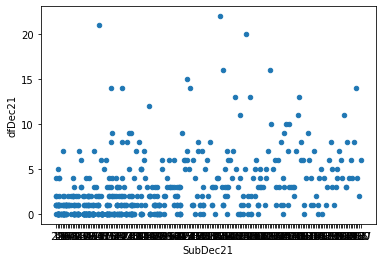

In [12]:
modfafsa.plot.scatter(x='SubDec21', y='dfDec21')

In [13]:
modfafsa=modfafsa[modfafsa['dfDec21']!=0]

<AxesSubplot:xlabel='SubDec21', ylabel='dfDec21'>

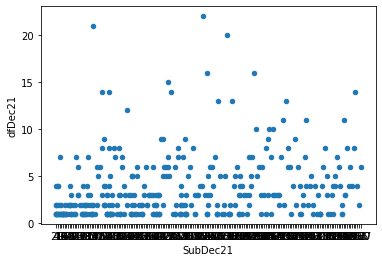

In [14]:
modfafsa.plot.scatter(x='SubDec21', y='dfDec21')

In [22]:
total_sub=sum(modfafsa['SubDec21'].astype(int))
total_incomp=sum(modfafsa['dfDec21'])
percent_incomp=(total_incomp/total_sub)*100
print("Percent of submitted application that are incomplete for december 2021: "+str(percent_incomp)+"%")

Percent of submitted application that are incomplete for december 2021: 3.9387108565858413%


In [24]:
new_fafsa = pandas.read_excel("Copy of WI FAFSA Completions thru 042222-Copy1.xlsx", sheet_name=1)
new_fafsa

,Free Application for Federal Student Aid (FAFSA) Estimated Completion Rates by Public School District \nApplications processed through April 22 of the first 15 months of each cycle,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,2022/ 2023 Cycle,2021/ 2022 Cycle,NaN,NaN
1,NaN,NaN,NaN,"Through April 22, 2022","Through April 22, 2021",Through June 2021,Through December 2021
2,LEAID,District Name,State,Estimated FAFSA\nCompletion Percentage\nApr22 ...,Estimated FAFSA\nCompletion Percentage\nApr22 ...,Estimated FAFSA\nCompletion Percentage\nJun 2021,Estimated FAFSA\nCompletion Percentage\nDec 2021
3,5500030,ABBOTSFORD SCHOOL DISTRICT,WI,35-39,40-44,45-49,50-54
4,5500060,ADAMS-FRIENDSHIP AREA SCHOOL DISTRICT,WI,20-24,25-29,30-34,40-44
...,...,...,...,...,...,...,...
362,5501230,WISCONSIN HEIGHTS SCHOOL DISTRICT,WI,45-49,50-54,50-54,50-54
363,5517070,WISCONSIN RAPIDS SCHOOL DISTRICT,WI,30-34,40-44,45-49,50-54
364,5517100,WITTENBERG-BIRNAMWOOD SCHOOL DISTRICT,WI,35-39,35-39,40-44,45-49
365,5517130,WONEWOC-UNION CENTER SCHOOL DISTRICT,WI,35-39,25-29,30-34,30-34


In [31]:
new_fafsa.drop(index=2, inplace=True)
new_fafsa

,LEAID,District Name,State,Jun10-22,Jun10-21,Jun-21,Dec-21
3,5500030,ABBOTSFORD SCHOOL DISTRICT,WI,35-39,40-44,45-49,50-54
4,5500060,ADAMS-FRIENDSHIP AREA SCHOOL DISTRICT,WI,20-24,25-29,30-34,40-44
5,5500120,ALBANY SCHOOL DISTRICT,WI,35-39,45-49,45-49,45-49
6,5500150,ALGOMA SCHOOL DISTRICT,WI,25-29,40-44,45-49,45-49
7,5500210,ALMA CENTER SCHOOL DISTRICT,WI,45-49,35-39,40-44,50-54
...,...,...,...,...,...,...,...
362,5501230,WISCONSIN HEIGHTS SCHOOL DISTRICT,WI,45-49,50-54,50-54,50-54
363,5517070,WISCONSIN RAPIDS SCHOOL DISTRICT,WI,30-34,40-44,45-49,50-54
364,5517100,WITTENBERG-BIRNAMWOOD SCHOOL DISTRICT,WI,35-39,35-39,40-44,45-49
365,5517130,WONEWOC-UNION CENTER SCHOOL DISTRICT,WI,35-39,25-29,30-34,30-34


In [32]:
new_fafsa[['From','To']]=new_fafsa['Jun10-22'].str.split('-', expand=True)
new_fafsa

,LEAID,District Name,State,Jun10-22,Jun10-21,Jun-21,Dec-21,From,To
3,5500030,ABBOTSFORD SCHOOL DISTRICT,WI,35-39,40-44,45-49,50-54,35,39
4,5500060,ADAMS-FRIENDSHIP AREA SCHOOL DISTRICT,WI,20-24,25-29,30-34,40-44,20,24
5,5500120,ALBANY SCHOOL DISTRICT,WI,35-39,45-49,45-49,45-49,35,39
6,5500150,ALGOMA SCHOOL DISTRICT,WI,25-29,40-44,45-49,45-49,25,29
7,5500210,ALMA CENTER SCHOOL DISTRICT,WI,45-49,35-39,40-44,50-54,45,49
...,...,...,...,...,...,...,...,...,...
362,5501230,WISCONSIN HEIGHTS SCHOOL DISTRICT,WI,45-49,50-54,50-54,50-54,45,49
363,5517070,WISCONSIN RAPIDS SCHOOL DISTRICT,WI,30-34,40-44,45-49,50-54,30,34
364,5517100,WITTENBERG-BIRNAMWOOD SCHOOL DISTRICT,WI,35-39,35-39,40-44,45-49,35,39
365,5517130,WONEWOC-UNION CENTER SCHOOL DISTRICT,WI,35-39,25-29,30-34,30-34,35,39


In [50]:
for i in new_fafsa['To']: 
    #print(i)
    if i!='None':
        #new_fafsa=new_fafsa.replace(i, '0')
        print(i)
        

#new_fafsa

39
24
39
29
49
None
34
54
39
24
44
44
54
34
49
59
24
34
44
39
39
54
34
44
39
49
59
34
49
39
39
44
29
59
24
None
44
34
49
39
49
39
44
34
44
54
34
39
54
64
39
54
59
49
64
49
49
59
34
39
24
49
29
44
49
34
24
29
39
34
44
29
49
29
54
44
54
59
54
39
44
34
49
29
44
49
39
44
54
44
34
44
44
34
39
64
49
29
64
49
24
49
39
34
69
39
44
44
39
59
34
44
49
54
69
54
29
44
59
54
29
44
44
59
44
54
44
49
39
39
64
49
34
44
44
49
49
54
64
24
44
64
49
39
34
39
44
39
49
39
59
49
34
44
44
49
79
44
64
54
49
44
44
39
59
54
29
34
49
44
59
54
44
64
29
39
54
54
29
44
44
39
44
49
44
34
39
None
34
29
None
39
44
59
49
34
44
74
44
49
54
39
34
54
49
49
44
54
44
49
39
34
29
54
59
34
24
34
44
44
59
29
34
44
34
69
39
49
69
59
44
49
39
44
44
54
54
44
29
44
34
49
54
34
34
59
54
39
49
44
49
24
49
44
54
34
49
54
54
49
24
44
39
59
44
44
29
49
39
44
49
54
44
59
49
59
59
49
34
49
49
49
34
54
None
None
54
29
49
49
49
44
34
64
34
39
59
39
39
39
54
29
54
39
34
39
44
49
54
54
49
39
34
44
44
54
34
49
39
34
54
39
39
44
54
44
59
39
44
4